<a href="https://colab.research.google.com/github/gksrhdms/wineSort/blob/main/datascience_WineSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 와인 데이터 확인

from sklearn.datasets import load_wine
wine = load_wine( )
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
# 와인 경작자 분류
#  - 클래스가 3개이므로 이 모형은 다중분류 문제를 해결


# 원시 데이터에서 학습 데이터로 변환
import pandas as pd
import numpy as np

wine_feature = wine.data
wine_label = wine.target

df_wine = pd.DataFrame(data=wine_feature, columns=[wine.feature_names])
df_wine['label'] = wine_label
df_wine

#wine.data는 사이킷런의 와인 데이터에서 특성 넘파이 배열을 반환함.
#wine.target은 사이킷런의 와인 데이터에서 레이블 넘파이 배열을 반환함.
#가져온 특성 배열을 데이터프레임 df_wine으로 변환하고 label 열을 추가.



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
import pandas as pd
import numpy as np

wine_feature = wine.data
wine_label = wine.target

df_wine = pd.DataFrame(data=wine_feature, columns=[wine.feature_names])
df_wine['label'] = wine_label
df_wine


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
# 테스트 데이터 분할

from sklearn.model_selection import train_test_split

df_wine = df_wine.astype({'label':'int'})
train, test = train_test_split(df_wine, test_size=0.3, random_state=0, stratify=df_wine['label'])

train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]

test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]


In [ ]:
# K-NN 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#학습하기
model = KNeighborsClassifier()
#model.fit(train_X, train_Y)
model.fit(train_X, np.ravel(train_Y))

#테스트와 평가하기
pred_knn = model.predict(test_X)
print('KNN 알고리즘 분류 정확도:', metrics.accuracy_score(pred_knn, test_Y))


KNN 알고리즘 분류 정확도: 0.7222222222222222


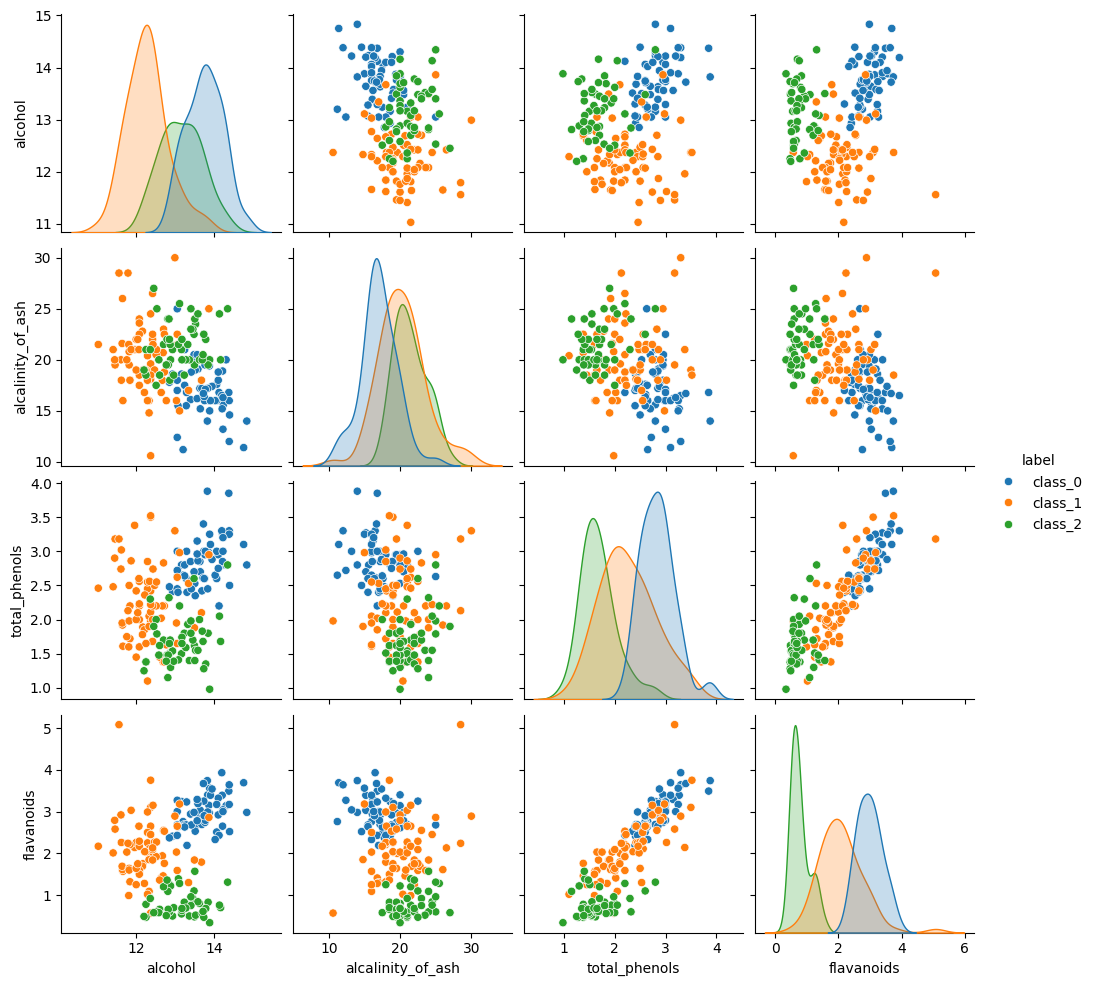

In [ ]:
#특성 간 상관관계와 레이블 분포를 시각화
import seaborn as sns

df_analysis = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype='category')
wine_class = wine_class.cat.rename_categories(wine.target_names)
df_analysis['label'] = wine_class

sns.pairplot(vars=['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'],\
	hue='label', data=df_analysis)

# 데이터 프레임 df_analysis를 정의하고 데이터프레임 wine_class에 레이블 데이터를 할당
# 특성 'alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'를 선택하여 특성 간 상관관계와 특성별 레이블 분포 확인


In [ ]:
# 중요도가 낮은 alcalinity_of_ash, total_phenols, proanthocyanins 열을 제거하고 학습 진행

from sklearn.ensemble import RandomForestClassifier

df_wine_proc = df_wine.drop(labels=['alcalinity_of_ash', 'total_phenols', 'proanthocyanins'], axis=1)
df_wine_proc = df_wine_proc.astype({'label':'int'})

train, test = train_test_split(df_wine_proc, test_size=0.3, random_state=0,\
		stratify=df_wine_proc['label'])

train_X=train[train.columns[:10]]
train_Y=train[train.columns[10:]]
test_X=test[test.columns[:10]]
test_Y=test[test.columns[10:]]

model = RandomForestClassifier(n_estimators=3)
#model.fit(train_X, train_Y)
model.fit(train_X, np.ravel(train_Y))
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF, test_Y))


랜덤 포레스트 알고리즘 분류 정확도: 0.9259259259259259


/tmp/ipython-input-2854176084.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_wine_proc = df_wine.drop(labels=['alcalinity_of_ash', 'total_phenols', 'proanthocyanins'], axis=1)


In [ ]:
# => 분류 정확도는 96.2%로, k-nn 알고리즘 이용한 분류보다 성능 높음

SyntaxError: invalid syntax (ipython-input-1916619424.py, line 1)

In [ ]:
# 화이트 와인과 레드 와인 분류

#데이터 프레임 생성
import numpy as np
import pandas as pd

df_white = pd.read_csv('/content/winequality-white.csv', sep=';')
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# 레이블 열 추가
df_white['class'] = 1
df_red['class'] = 0

df_white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
# df_wine에 class 열을 추가하고 값으로 1을 입력.
# 데이터프레임 df_red에 class 열을 추가하고 값으로 0을 입력

In [ ]:
# 데이터셋 병합
df_wine_category = pd.concat([df_white, df_red])

In [ ]:
# 학습 데이터 분할 (학습 데이터와 테스트 데이터로 분할)

from sklearn.model_selection import train_test_split

df_wine_category = df_wine_category.astype({'class':'int'})
train, test = train_test_split(df_wine_category, test_size=0.3, random_state=0,\
		stratify=df_wine_category['class'])

train_X = train[train.columns[:12]]
train_Y = train[train.columns[12:]]
test_X = test[test.columns[:12]]
test_Y = test[test.columns[12:]]

train_X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2126,6.5,0.43,0.28,12.0,0.056,23.0,174.0,0.99860,3.31,0.55,9.3,5
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.6,6
725,6.4,0.39,0.21,1.2,0.041,35.0,136.0,0.99225,3.15,0.46,10.2,5
4557,6.1,0.37,0.46,12.0,0.042,61.0,210.0,0.99700,3.17,0.59,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8
2032,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6
3239,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6


In [ ]:
# class 열의 레이블 값을 범주형으로 변환
# 특성 열과 레이블 열을 따로 변수에 저장

In [ ]:
# 학습 준비는 끝!
# 이번에는 이진분류 성능이 좋은 SVM 알고리즘으로 분류해보자
# 패키지들 불러오기
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [ ]:
# SVM 이진분류 : 데이터셋 학습하고 이 모형이 얼마나 정확하게 분류하는지 평가

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
#model.fit(train_X, train_Y)
model.fit(train_X, np.ravel(train_Y))
pred_SVM = model.predict(test_X)

print('SVM 알고리즘 분류 정확도:', metrics.accuracy_score(pred_SVM, test_Y))
print(classification_report(test_Y, pred_SVM))

SVM 알고리즘 분류 정확도: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.99      0.99      0.99      1484

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Github/WineSort

/content/drive/MyDrive/Github/WineSort


In [ ]:
# 랜덤포레스트 이진분류
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
#model.fit(train_X, train_Y)
model.fit(train_X, np.ravel(train_Y))

pred_RF = model.predict(test_X)

print('Random Forest 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF,test_Y))
print(classification_report(pred_RF,test_Y))


Random Forest 알고리즘 분류 정확도: 0.9912820512820513
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       471
           1       1.00      0.99      0.99      1479

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [ ]:
# SVM보다 약간 향상된 99.2%의 정확도로 와인 분류

In [ ]:
# 와인 등급 예측
# 먼저 예측 대상인 와인 등급의 분포를 확인
import numpy as np
import pandas as pd
import plotly.express as px

df_white = pd.read_csv('/content/winequality-white.csv', sep=';')
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')
df_wine_predic = pd.concat([df_white, df_red])  # df_white와 df_red를 하나로 병합

px.histogram(df_wine_predic.quality)


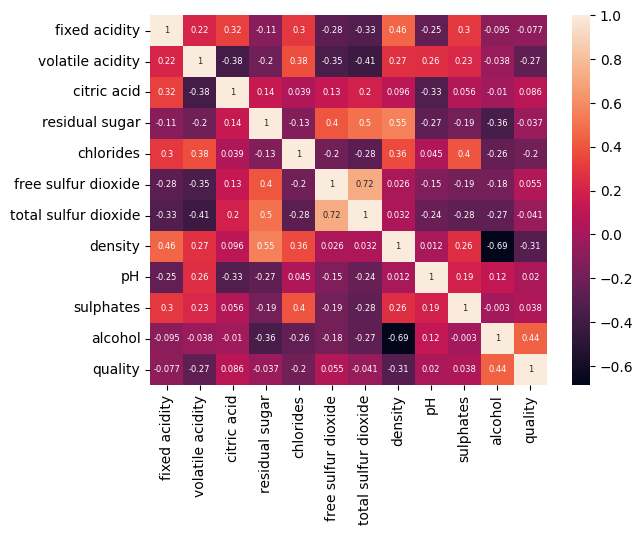

In [ ]:
# 특성간의 상관관계 파악하기

# 데이터 특성 히트맵
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(df_wine_predic.corr( ), annot=True, annot_kws={'size':6})
plt.show( )
# corr()함수로 데이터프레임 df_wine_predic의 특성 간 상관관계 계산


In [ ]:
# 데이터를 테스트 데이터와 학습데이터로 분할

from sklearn.model_selection import train_test_split

df_wine_predic.columns = df_wine_predic.columns.str.replace(' ', '_')
train, test = train_test_split(df_wine_predic, test_size=0.3, random_state=0,
stratify=df_wine_predic['quality'])

train_X = train[train.columns[:11]]
train_Y = train[train.columns[11:]]
test_X = test[test.columns[:11]]
test_Y = test[test.columns[11:]]


In [ ]:
# 사용할 특성이 11개 => 다중 선형 회귀분석 알고리즘 사용

from statsmodels.formula.api import ols, glm
reg_form = 'quality ~ fixed_acidity + volatile_acidity + citric_acid\
 + residual_sugar + chlorides + free_sulfur_dioxide\
 + total_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result = ols(reg_form, data=train).fit( )


In [ ]:
# => OLS(최소자승법)함수로 회귀 예측을 수행.
# 정속변수 quality와 독립변수 11개로 모형을 작성

In [ ]:
# 와인 등급 점수 예측

reg_predict = reg_result.predict(test)
print(reg_predict)
reg_predict = reg_predict.astype('int')


1209    6.209276
3193    5.647934
1192    6.724634
3852    6.538731
2022    5.294939
          ...   
305     5.485388
1963    5.194879
4305    6.015268
4798    5.933790
1384    4.731303
Length: 1950, dtype: float64


In [ ]:
# 예측 정확도

from sklearn import metrics
print('다중 선형회귀 알고리즘 예측 정확도:', metrics.accuracy_score(reg_predict,test_Y))

다중 선형회귀 알고리즘 예측 정확도: 0.4574358974358974


In [ ]:
# 예측 정확도는 약 46%
# 분류 문제보다는 정확도가 낮게 나타남
# => 이유?? -> 범주형과 연속형 값의 차이 때문

In [ ]:
# 랜덤 포레스트 예측
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



랜덤 포레스트 알고리즘 예측 정확도: 0.6594871794871795


In [ ]:
# 예측 정확도는 약 66%
# 다중 선형회귀보다 약 20% 높음

In [ ]:
# 심화분석 :
# 인공 신경망을 활용해서 와인 등급 예측하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# 시퀀셜(Sequential)은 인공신경망에 연결 구조를 만들어서
# 모형을 생성할 수 있도록 틀을 정의
# 덴스(Dense)는 뉴런으로 층(Layer)을 만듦

In [ ]:
# 인공 신경망
#  - 입력층 : 학습 데이터를 입력받아 신겸망에 전달
#  - 은닉층 : 뉴런 간에 데이터가 전파되어 학습이 진행됨
#  - 출력층 : 레이블 값을 출력

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # Sequential 모델을 새로 생성
model.add(Dense(32, activation='relu', input_shape=(train_X.shape[1],))) # input_dim을 input_shape로 변경
model.add(Dense(16, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu'))  # Hidden 3
model.add(Dense(4, activation='relu'))  # Hidden 4

In [ ]:
# 인공신경망의 출력층 설정

model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,119 (4.37 KB)

 Trainable params: 1,119 (4.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 입력층 1개, 은닉층 3개, 출력층 1개로 => 총 5층의 모형 생성됨

In [ ]:
# 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# 원핫 인코딩
from sklearn.preprocessing import LabelEncoder
from keras import utils
#from keras.utils import np_utils

#레이블을 학습 데이터 레이블 모형으로 변환하기
encoder = LabelEncoder( )
encoder.fit(train_Y)

onehot_train_Y = encoder.transform(train_Y)
train_f_Y = utils.to_categorical(onehot_train_Y)
#train_f_Y = np_utils.to_categorical(onehot_train_Y)
onehot_test_Y = encoder.transform(test_Y)
test_f_Y = utils.to_categorical(onehot_test_Y)
#test_f_Y = np_utils.to_categorical(onehot_test_Y)

print(test_f_Y)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# 인공신경망 학습
model.fit(train_X, train_f_Y, epochs=500, batch_size=10)

Epoch 1/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2714 - loss: 4.4062
Epoch 2/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4281 - loss: 1.3222
Epoch 3/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4340 - loss: 1.3005
Epoch 4/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4483 - loss: 1.2857
Epoch 5/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4393 - loss: 1.2837
Epoch 6/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4347 - loss: 1.2609
Epoch 7/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4595 - loss: 1.2591
Epoch 8/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4668 - loss: 1.2246
Epoch 9/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4466 - loss: 1.2653
Epoch 10/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4717 - loss: 1.2340
Epoch 11/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4782 - loss: 1.2126
Epoch 12/500
455/455 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 예측 성능 평가
model.evaluate(test_X, test_f_Y)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5545 - loss: 1.1167


[1.1538304090499878, 0.5446153879165649]